# 用户指南，第26章：遍历与过滤
[原文链接](https://www.music21.org/music21docs/usersGuide/usersGuide_26_iterators.html)

TODO

In [1]:
letterList = ['a', 'b', 'c']

In [2]:
alphabet = ''
alphabet += letterList[0]
alphabet += letterList[1]
alphabet += letterList[2]
alphabet

'abc'

In [3]:
alphabet = ''
for letter in letterList:
    alphabet += letter

alphabet

'abc'

In [4]:
''.join(letterList)

'abc'

In [5]:
min([10, 20, 30, -3423, 40])

-3423

In [6]:
len(letterList)

3

In [7]:
zeroToFifty = range(51)
zeroToFifty

range(0, 51)

In [8]:
for n in zeroToFifty:
    print(n)
    if n != 0 and n % 5 == 0:
        break

0
1
2
3
4
5


In [9]:
from music21 import *

s = stream.Part(id='restyStream')
s.append(note.Note('C#'))
s.append(note.Rest(quarterLength=2.0))
s.append(note.Note('D', quarterLength=1.5))
s.append(note.Rest(quarterLength=1.0))

for thing in s:
    print(thing, thing.quarterLength)

<music21.note.Note C#> 1.0
<music21.note.Rest half> 2.0
<music21.note.Note D> 1.5
<music21.note.Rest quarter> 1.0


In [10]:
sIter = s.iter()
sIter

<music21.stream.iterator.StreamIterator for Part:restyStream @:0>

In [11]:
next(sIter)

<music21.note.Note C#>

In [12]:
next(sIter)

<music21.note.Rest half>

In [13]:
sIter

<music21.stream.iterator.StreamIterator for Part:restyStream @:2>

In [14]:
for el in sIter:
    print(el, el.quarterLength)

<music21.note.Note C#> 1.0
<music21.note.Rest half> 2.0
<music21.note.Note D> 1.5
<music21.note.Rest quarter> 1.0


In [15]:
restFilter = stream.filters.ClassFilter('Rest')
restIterator = sIter.addFilter(restFilter)
for el in restIterator:
    print(el, el.quarterLength)

<music21.note.Rest half> 2.0
<music21.note.Rest quarter> 1.0


In [16]:
sIter2 = s.iter()
offsetFilter = stream.filters.OffsetFilter(offsetStart=0.5, offsetEnd=4.0)
offsetIterator = sIter2.addFilter(offsetFilter)
for el in offsetIterator:
    print(el, el.offset)

<music21.note.Rest half> 1.0
<music21.note.Note D> 3.0


In [17]:
for el in s.iter().addFilter(restFilter).addFilter(offsetFilter):
    print(el, el.offset)

<music21.note.Rest half> 1.0


In [18]:
sIter4 = s.iter()
restIterator = sIter4.getElementsByClass('Rest')
restOffsetIterator = restIterator.getElementsByOffset(0.5, 4.0)
for el in restOffsetIterator:
    print(el, el.offset)

<music21.note.Rest half> 1.0


In [19]:
for el in s.iter().getElementsByClass('Rest').getElementsByOffset(0.5, 4.0):
    print(el, el.offset)

<music21.note.Rest half> 1.0


In [20]:
for el in s.getElementsByClass('Rest').getElementsByOffset(0.5, 4.0):
    print(el, el.offset)

<music21.note.Rest half> 1.0


In [21]:
def sharpFilter(el):
    if (hasattr(el, 'pitch') 
            and el.pitch.accidental is not None
            and el.pitch.accidental.alter > 0):
        return True
    else:
        return False
    
sharpIterator = s.iter().addFilter(sharpFilter)

for el in sharpIterator:
    print(el)

<music21.note.Note C#>


In [22]:
bach = corpus.parse('bwv66.6')
for thing in bach:
    print(thing)

<music21.stream.Part Soprano>
<music21.stream.Part Alto>
<music21.stream.Part Tenor>
<music21.stream.Part Bass>
<music21.layout.StaffGroup <music21.stream.Part Soprano><music21.stream.Part Alto><music21.stream.Part Tenor><music21.stream.Part Bass>>


In [23]:
recurseIter = bach.recurse()
recurseIter

<music21.stream.iterator.RecursiveIterator for Score:bach/bwv66.6.mxl @:0>

In [24]:
def eSharpFilter(el):
    try:
        if el.name == 'E#':
            return True
        else:
            return False
    except AttributeError:
        return False

eSharpIterator = recurseIter.addFilter(eSharpFilter)

for el in eSharpIterator:
    print(el, el.measureNumber)

<music21.note.Note E#> 9
<music21.note.Note E#> 3
<music21.note.Note E#> 7
<music21.note.Note E#> 7
<music21.note.Note E#> 2
<music21.note.Note E#> 6


In [25]:
for el in eSharpIterator:
    pId = el.getContextByClass(stream.Part).id
    print(el, el.measureNumber, pId)

<music21.note.Note E#> 9 Soprano
<music21.note.Note E#> 3 Alto
<music21.note.Note E#> 7 Alto
<music21.note.Note E#> 7 Tenor
<music21.note.Note E#> 2 Bass
<music21.note.Note E#> 6 Bass


In [26]:
chopin = corpus.parse('chopin/mazurka06-2')
chopinExcerpt = chopin.measures(1, 5)
for ch in chopinExcerpt[chord.Chord]:
    print(ch)

<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>


In [27]:
s.insert(0, clef.TrebleClef())
s.insert(0, key.KeySignature(3))
s.insert(1, instrument.Trumpet())

# normal iterator
for el in s:
    print(el, el.offset)

<music21.clef.TrebleClef> 0.0
<music21.key.KeySignature of 3 sharps> 0.0
<music21.note.Note C#> 0.0
Trumpet 1.0
<music21.note.Rest half> 1.0
<music21.note.Note D> 3.0
<music21.note.Rest quarter> 4.5


In [28]:
oIter = stream.iterator.OffsetIterator(s)
for elementGroup in oIter:
    print(elementGroup[0].offset, elementGroup)

0.0 [<music21.clef.TrebleClef>, <music21.key.KeySignature of 3 sharps>, <music21.note.Note C#>]
1.0 [<music21.instrument.Trumpet 'Trumpet'>, <music21.note.Rest half>]
3.0 [<music21.note.Note D>]
4.5 [<music21.note.Rest quarter>]


In [29]:
onlyESharps = bach.recurse().addFilter(eSharpFilter)
esharpStream = onlyESharps.stream()
esharpStream.show('text')

{8.0} <music21.note.Note E#>
{10.0} <music21.note.Note E#>
{23.0} <music21.note.Note E#>
{25.5} <music21.note.Note E#>
{27.0} <music21.note.Note E#>
{34.5} <music21.note.Note E#>


In [30]:
esharpStream.derivation

<Derivation of <music21.stream.Score bach/bwv66.6.mxl> from <music21.stream.Score bach/bwv66.6.mxl> via 'eSharpFilter'>

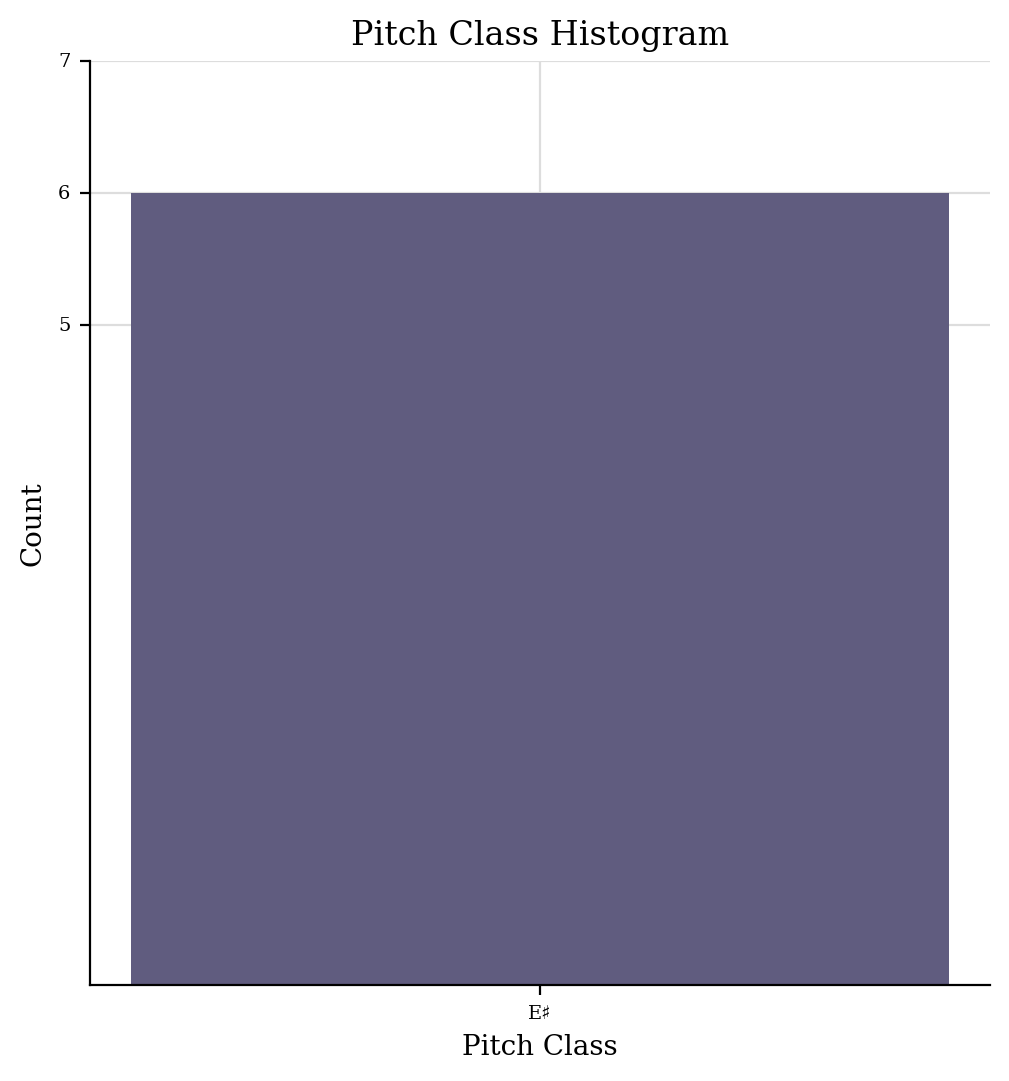

In [31]:
esharpStream.plot('pitchclass')

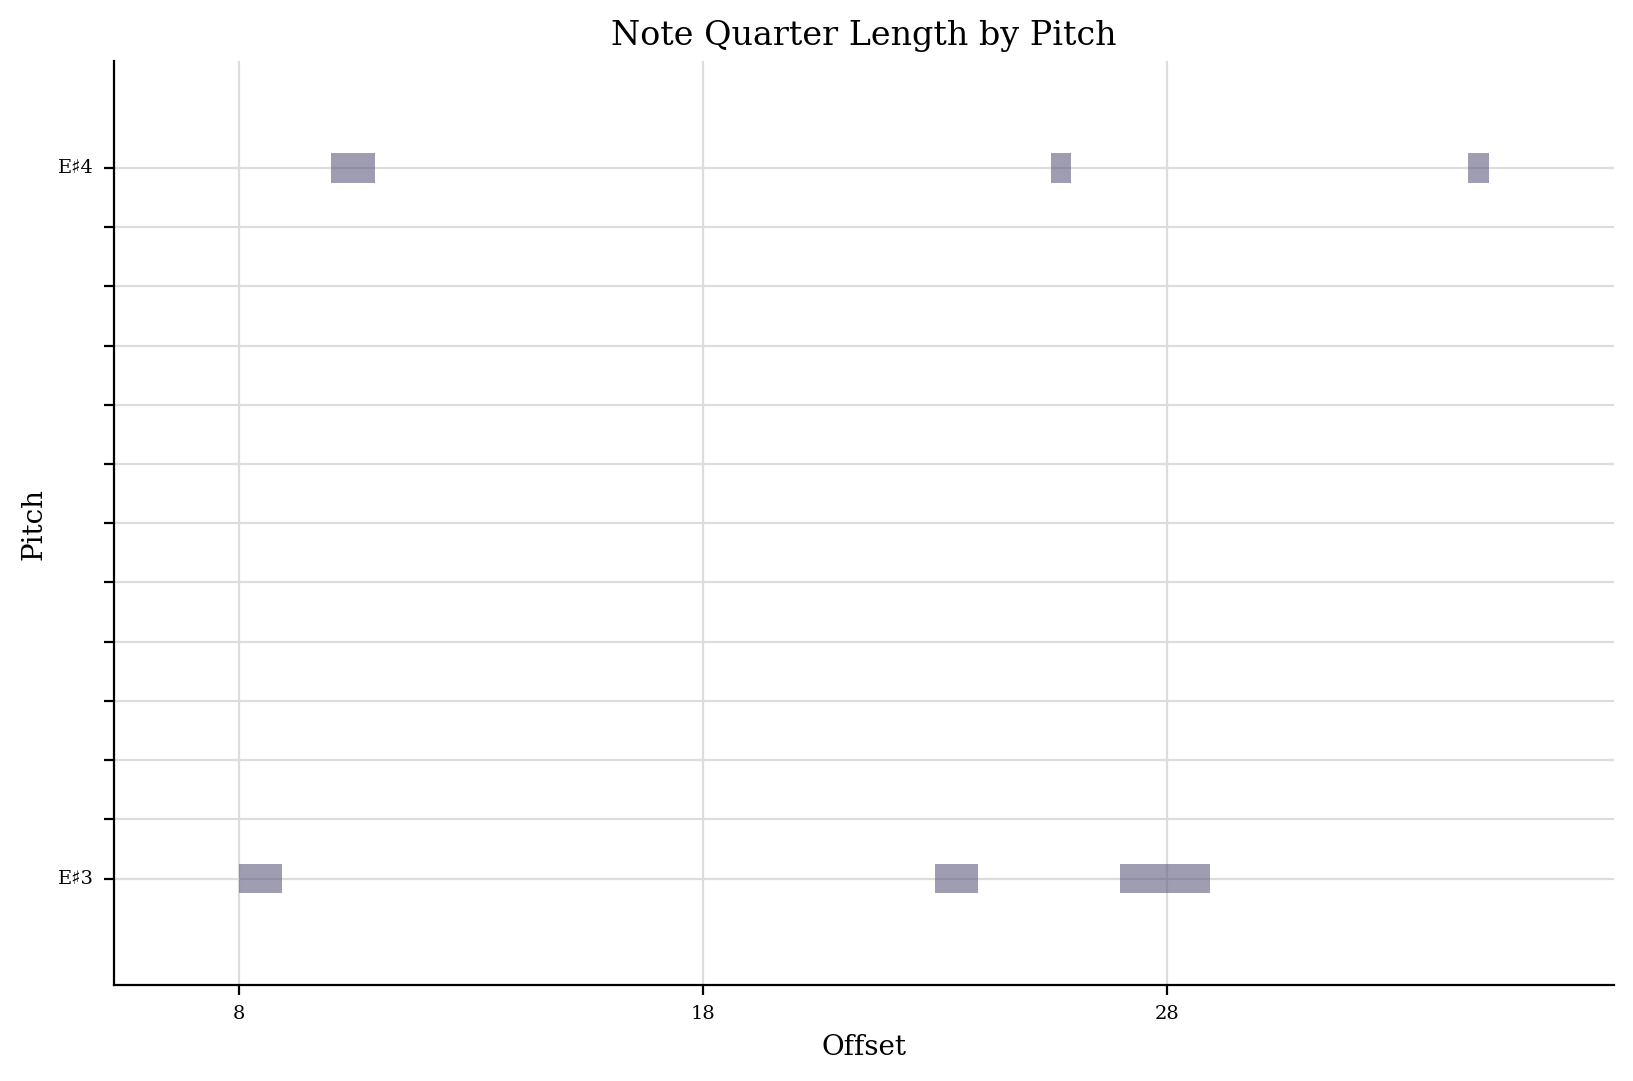

In [32]:
esharpStream.plot('pianoroll')